<a href="https://colab.research.google.com/github/sbm367/nyuparse/blob/master/NYU_Analytic_Statistics_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

New Stuff

In [25]:
# import libs
import numpy as np
import pandas as pd

# Get the data
github_url = 'https://raw.githubusercontent.com/sbm367/nyuparse/master/Final%20Survey%20Data%2C%20Cleaned%2C%20Anonymize.csv'
df = pd.read_csv(github_url)

df.head(3)



,Start Date,End Date,Q1 - How do you self identify with regards to Gender?,Q2 - How do you self identify with regards to Race?,Q3 - I identify as Hispanic or Latinx,Q4 - What is your age?,Q5 - What category of healthcare provider are you?,Q6 - Are you currently a student?,Q7 - Have you ever provided medical services over Telehealth?,"Q8 - On average, in the 6 months before COVID-19, how many hours a week did you provide services over Telehealth?","Q9 - On average since COVID-19, how many hours a week do you provide services over Telehealth?",Q10 - Have you ever done volunteer medical or free clinic work?,"Q11 - On average, in the 6 months before COVID-19, how many hours a week did you volunteer?","Q12 - On average since COVID-19, how many hours a week have you volunteered?","Q13 - Would you like to do more, less or the same amount of volunteer medical work?",Q14 - Have you ever done volunteer medical or free clinic work via Telehealth?,"Q15 - On average, in the 6 months before COVID-19, how many hours of your volunteer medical work per week was via Telehealth?","Q16 - On average, since COVID-19, how many hours of your volunteer medical work per week is currently via Telehealth?",Q17 - Would you be interested in participating in a future pilot of a Health Volunteering platform through NYU?
0,3/3/2021,3/3/2021,Female,White,Yes,56.0,NaN,No,Yes,1.0,25.0,Yes,2.0,2.0,Somewhat more,"No, but I would like to try",0.0,0.0,Yes
1,3/3/2021,3/3/2021,Female,Asian,No,34.0,Other,No,Yes,0.0,20.0,No,0.0,0.0,About the same,"No, but I would like to try",0.0,0.0,Yes
2,3/3/2021,3/3/2021,Male,Asian,No,44.0,Other,No,No,0.0,0.0,No,0.0,0.0,About the same,"No, but I would like to try",0.0,0.0,No


In [26]:
df.describe()

,Q4 - What is your age?,"Q8 - On average, in the 6 months before COVID-19, how many hours a week did you provide services over Telehealth?","Q9 - On average since COVID-19, how many hours a week do you provide services over Telehealth?","Q11 - On average, in the 6 months before COVID-19, how many hours a week did you volunteer?","Q12 - On average since COVID-19, how many hours a week have you volunteered?","Q15 - On average, in the 6 months before COVID-19, how many hours of your volunteer medical work per week was via Telehealth?","Q16 - On average, since COVID-19, how many hours of your volunteer medical work per week is currently via Telehealth?"
count,88.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,44.954545,0.865169,6.786517,0.561798,1.044944,0.078652,0.168539
std,12.923212,2.751822,10.100036,1.559101,4.977016,0.568585,1.002678
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,54.250000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,15.000000,45.000000,10.000000,45.000000,5.000000,8.000000


In [27]:
df['Q4 - What is your age?'].describe()

count    88.000000
mean     44.954545
std      12.923212
min      22.000000
25%      35.000000
50%      41.500000
75%      54.250000
max      75.000000
Name: Q4 - What is your age?, dtype: float64

---------------------------------------------------------------------------

NYU Analytic Statistics Final Project Part 2

In [ ]:
df['Q12'].describe()

count     34
unique     5
top         
freq      17
Name: Q12, dtype: object

In [ ]:
df[['Q11','Q12']].mean()

0
Q11    6.479412e+15
Q12    6.176471e+14
dtype: float64

# Stats and regressions libs

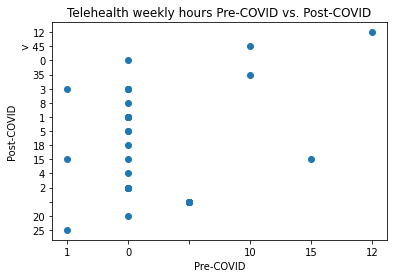

3      1
4      0
5       
6      0
7      0
8      1
9      0
10     0
11     0
12     0
13      
14     0
15     0
16     0
17     0
18      
19     0
20     0
21     0
22     0
23    10
24     0
25      
26      
27     0
28    10
29     1
30     0
31      
32     0
33     0
34    15
35     0
36    12
Name: Q8, dtype: object
3       25
4       20
5         
6        2
7        4
8       15
9        2
10       2
11      18
12      15
13        
14       2
15       5
16       1
17       1
18        
19       1
20       8
21       3
22       3
23      35
24       0
25        
26        
27       3
28    > 45
29       3
30       1
31        
32       2
33       5
34      15
35       1
36      12
Name: Q9, dtype: object


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

'''
df.Q9 = df.Q9.replace(r'> 45', 46, regex=True)
print(df.Q9)
'''

plt.scatter(df.Q8, df.Q9)
plt.title('Telehealth weekly hours Pre-COVID vs. Post-COVID')
plt.xlabel('Pre-COVID')
plt.ylabel('Post-COVID')
plt.show()

print(df.Q8)
print(df.Q9)


# 1. Background and Motivation

In the wake of the covid 19 pandemic [a lot of people] lost thier healthcare because this is america. 

often a critical resource for the un insured and underinsured are volunteer or free clinics, but because of covid it hard to do that stuff in person.

at the same time during covid, telehealth seems to heave really taken off as a way to provide care. it seems like inteerms of volunteercare, where the need is greater than ever, telehealth adoption is at the lowerst.

this could be because free clinics arnt great with adapting to the tech, or becasue doctors arnt, or because they just dont have telehealth volunteering oprotunities,

so we made this survey to find out. 

# 2. Methodology




include link to survey here : https://nyu.qualtrics.com/jfe/form/SV_1XG93kLodn2ByNT

# 3. Summary of Findings

# 4. Disscusion of Findings

## 4. a. Descriptive Analysis

summary stats andeverything here

## 4. b. Statistical Analysis

stats and regression here 

# 5. Limitations (of Survey & Data )

# 6. Conclusions & Further Research

# A. Apendix